<a href="https://colab.research.google.com/github/Monika1kaphle/AI-coursework/blob/main/2408878_MonikaKaphle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assesment
!ls diabetes_prediction_dataset.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Assesment
diabetes_prediction_dataset.csv


#1 Tasks - To - Do

##1.1 For Classification Task

###1.1.1 Exploratory Data Analysis and Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [ ]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
print("\nTarget Variable Distribution:")
print(df["diabetes"].value_counts())


Target Variable Distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64


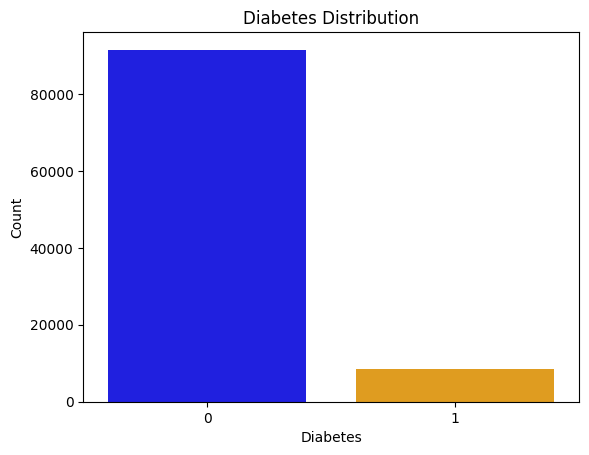

In [ ]:
color_map = {0: "blue", 1: "orange"}

sns.countplot(data=df, x="diabetes", hue="diabetes", palette=color_map, legend=False)
plt.title("Diabetes Distribution")  # Update title for clarity
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

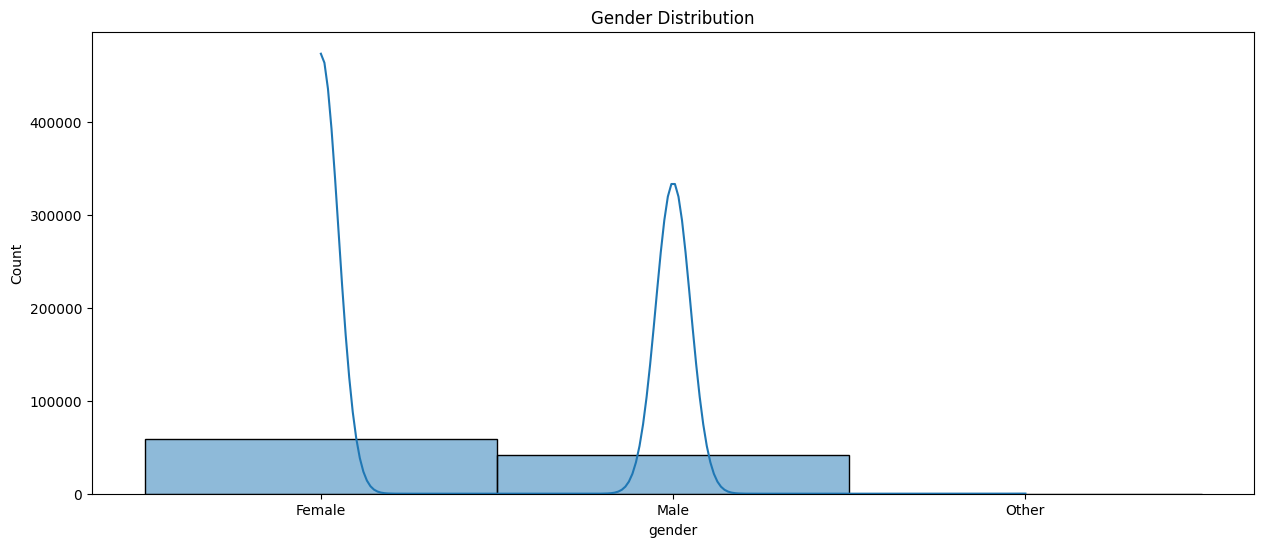

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(df['gender'], kde=True)
plt.title('Gender Distribution')
plt.show()

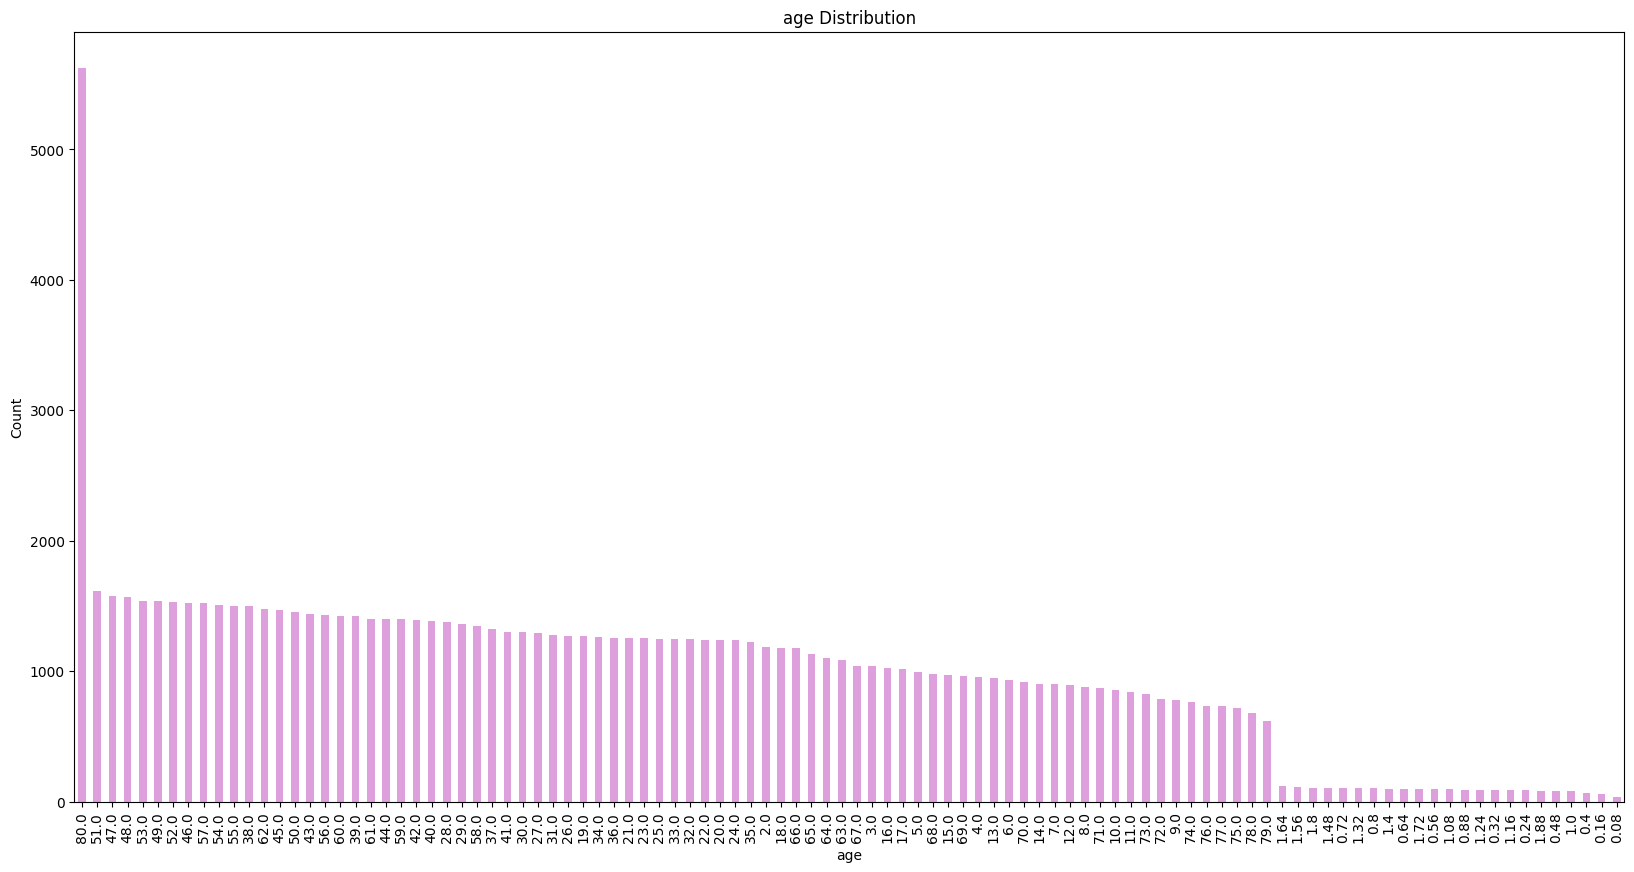

In [ ]:
plt.figure(figsize=(20, 10))
df['age'].value_counts().plot(kind='bar', color='plum')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Import the necessary class
from sklearn.preprocessing import LabelEncoder

# Convert target column to binary (Dropout = 1, Others = 0)
df['diabetes'] = df['diabetes'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Split features (X) and target (y)
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target variable

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Categorical Columns: Index([], dtype='object')


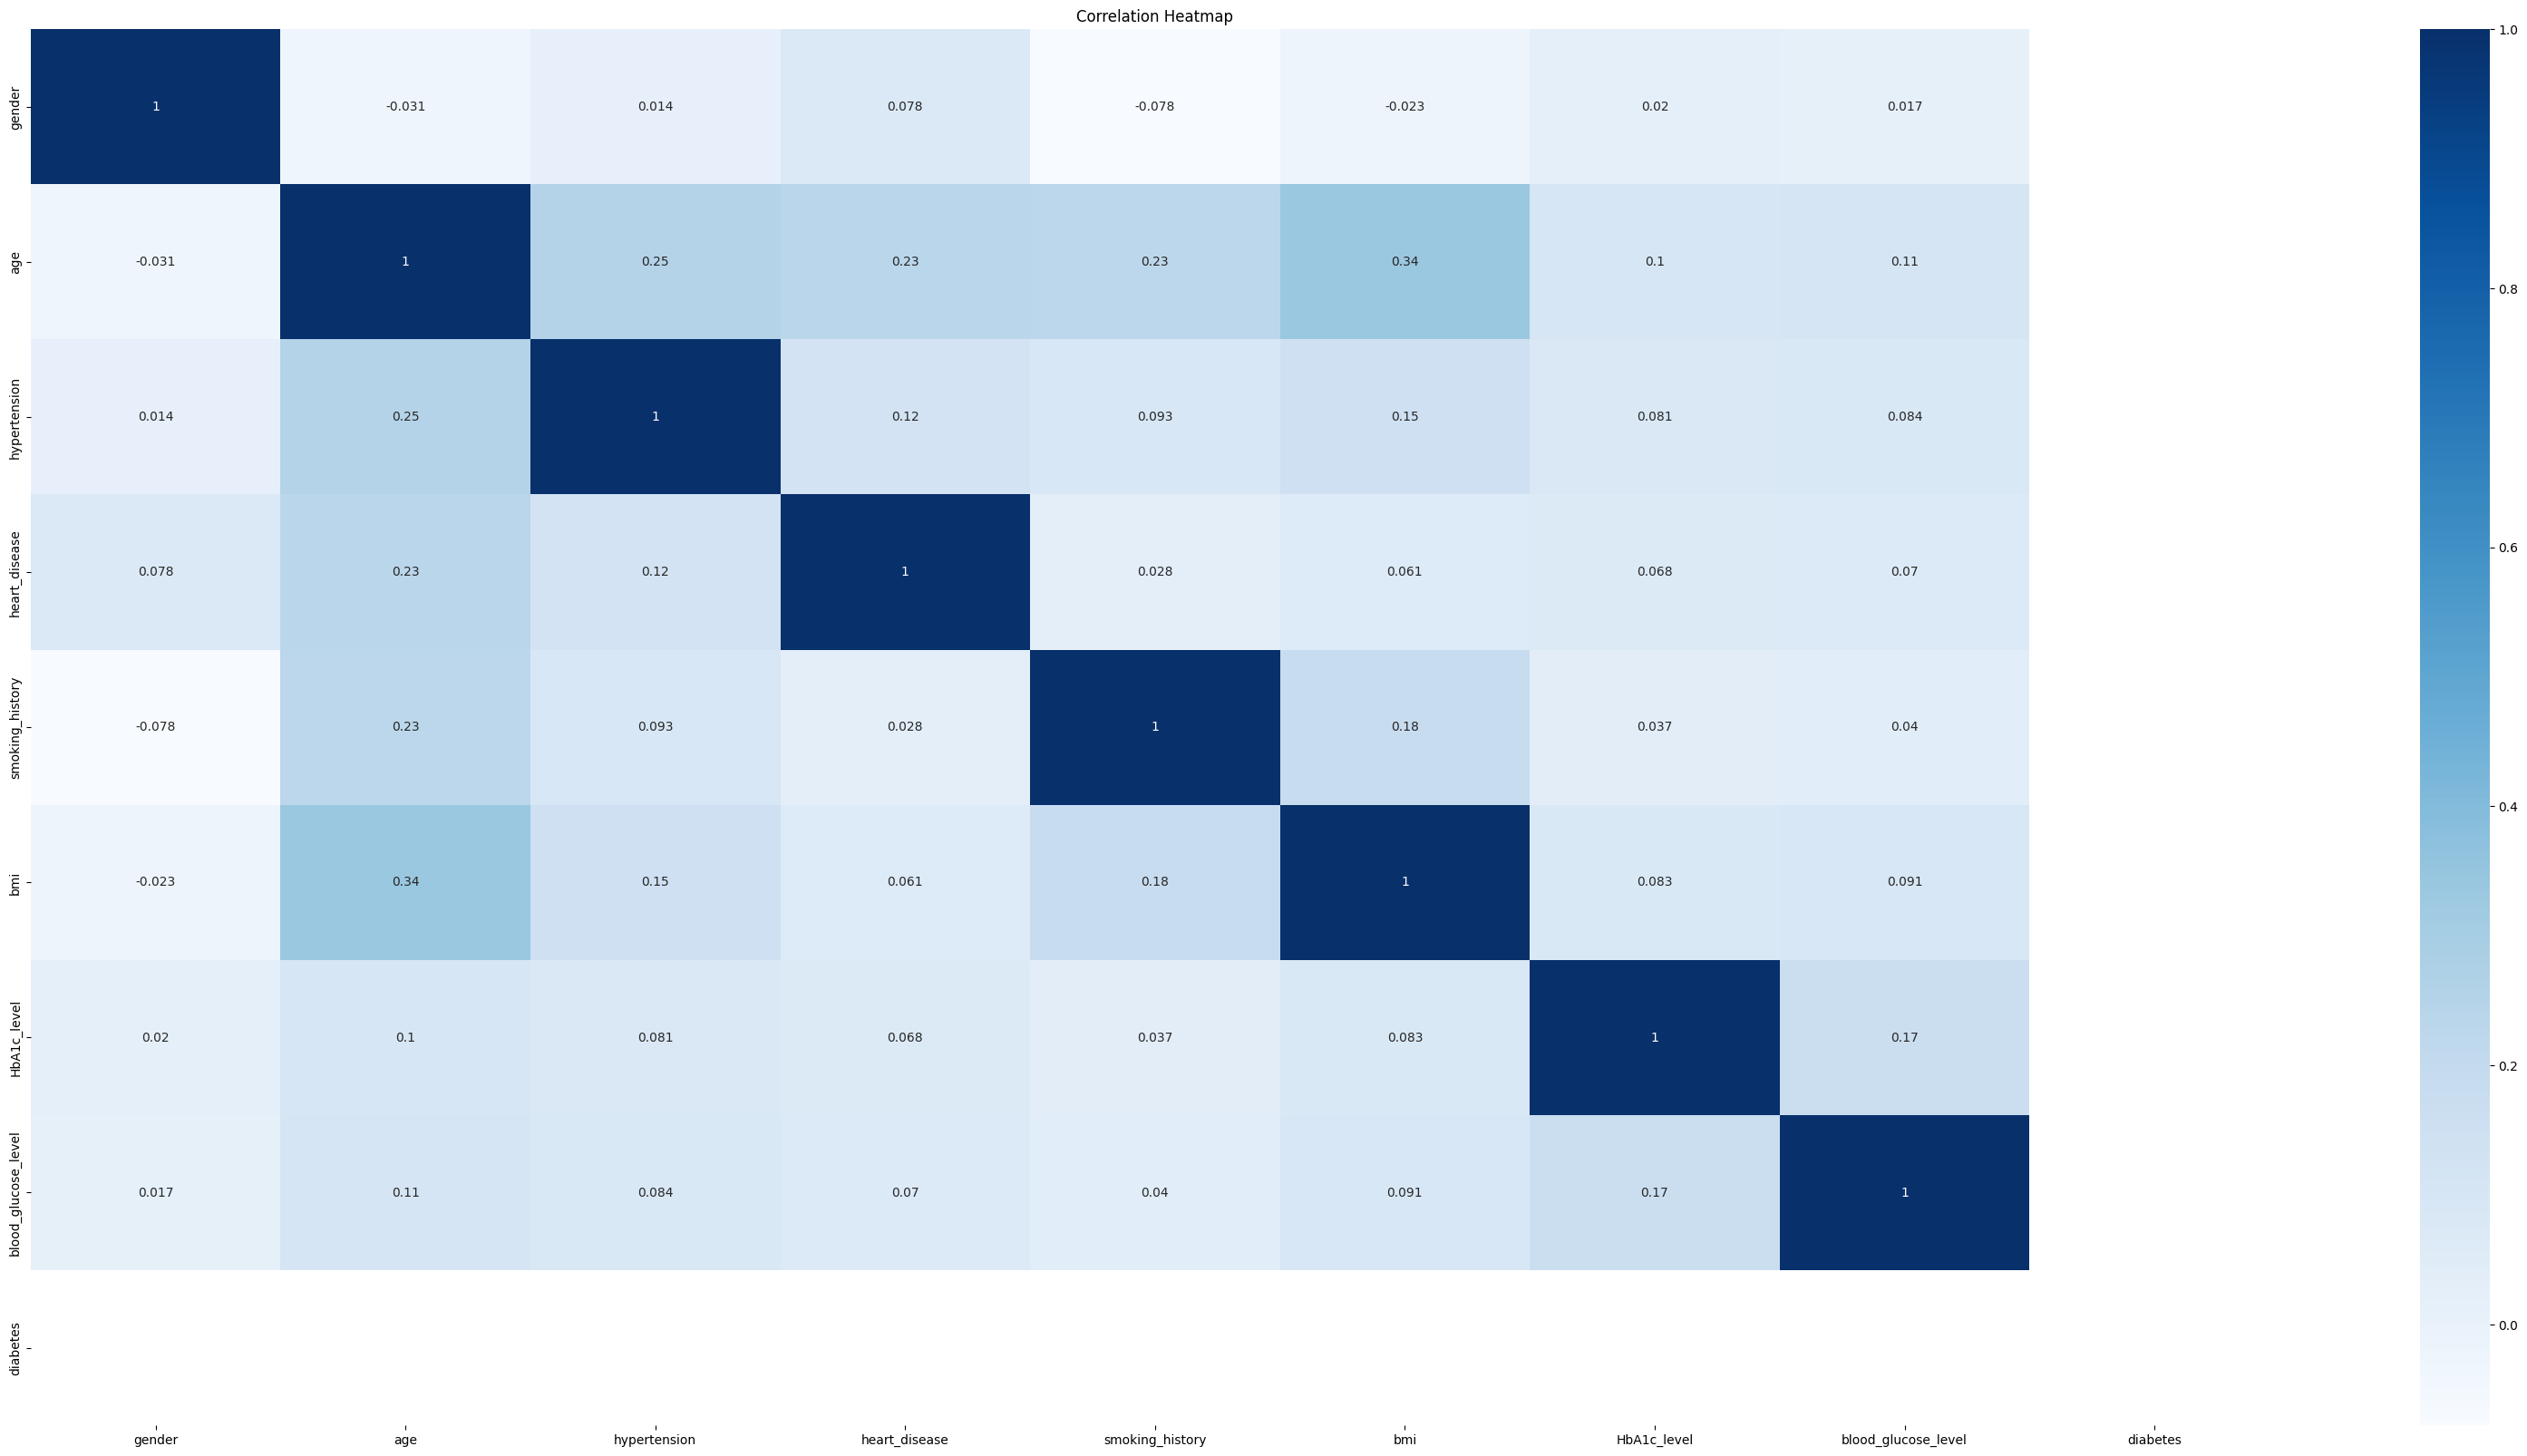

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
unique_classes, class_counts = np.unique(y, return_counts=True)
print(f"Classes in y: {unique_classes}")
print(f"Class distribution: {class_counts}")


Classes in y: [0]
Class distribution: [100000]


###1.1.2 Build a Model from Scratch

**Data Preprocessing:**

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logistic Regression from scratch**


In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

**Train the model**

In [ ]:
log_reg = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)

**Make predictions**

In [ ]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

**Evaluate the model**

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

**Evaluation on training set**

In [ ]:
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")

Training Accuracy: 1.0
Training Precision: 0.0
Training Recall: 0.0
Training F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Evaluation on testing set**

In [ ]:
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")

Test Accuracy: 1.0
Test Precision: 0.0
Test Recall: 0.0
Test F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###1.1.3Build a Primary Model

**Importing Logistic Regression Model from sklearn**

In [ ]:
from sklearn.metrics import classification_report

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test, y_pred_sklearn))

Scikit-Learn Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



**Initialize the Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

**Train the Random Forest model**

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50)

**Predictions**

In [ ]:
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

**Evaluate on training set**

In [ ]:
train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf = evaluate_model(y_train, y_pred_rf_train)

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Training Precision: {train_precision_rf}")
print(f"Random Forest Training Recall: {train_recall_rf}")
print(f"Random Forest Training F1 Score: {train_f1_rf}")

Random Forest Training Accuracy: 1.0
Random Forest Training Precision: 0.0
Random Forest Training Recall: 0.0
Random Forest Training F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Evaluate on testing set**

In [ ]:
test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf = evaluate_model(y_test, y_pred_rf_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Test Precision: {test_precision_rf}")
print(f"Random Forest Test Recall: {test_recall_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")

Random Forest Test Accuracy: 1.0
Random Forest Test Precision: 0.0
Random Forest Test Recall: 0.0
Random Forest Test F1 Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###1.1.4 Hyper-parameter Optimization with Cross-Validation

**Logistic Regression Hyperparameter Tuning using GridSearchCV**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Check class distribution before splitting
unique_classes, class_counts = np.unique(y, return_counts=True)
print(f"Classes in y: {unique_classes}")
print(f"Class distribution: {class_counts}")

# Display message if dataset has only one class
if len(unique_classes) < 2:
    print("Error: Training data contains only one class. Please check your dataset.")
else:
    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Define parameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['lbfgs'],
        'max_iter': [100, 200, 300],
        'penalty': ['l2']
    }

    # Initialize Logistic Regression model
    log_reg_sklearn = LogisticRegression()

    # Perform GridSearchCV
    grid_search = GridSearchCV(log_reg_sklearn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters
    best_log_reg_params = grid_search.best_params_
    print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")



Classes in y: [0]
Class distribution: [100000]
Error: Training data contains only one class. Please check your dataset.


**Random Forest Hyperparameter Tuning using GridSearchCV**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


###1.1.5 Feature Selection

**Random Forest Feature Selection using SelectFromModel (Embedded Method)**

In [ ]:
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=8)
sfm_rf.fit(X_train, y_train)

X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

selected_features_rf = sfm_rf.get_support()
selected_columns_rf = X.columns[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_columns_rf)

Selected features using Random Forest:
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


**Feature Selection for Logistic Regression using SelectFromModel (Embedded Method)**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Check class distribution before proceeding
unique_classes, class_counts = np.unique(y, return_counts=True)
print(f"Classes in y: {unique_classes}")
print(f"Class distribution: {class_counts}")

# Display a message if only one class is found and exit
if len(unique_classes) < 2:
    print("Error: Training data contains only one class. Feature selection and model training cannot proceed.")
else:
    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Define and train Logistic Regression model
    log_reg_sklearn = LogisticRegression()
    log_reg_sklearn.fit(X_train, y_train)

    # Feature selection using Logistic Regression
    selector_lr = SelectFromModel(log_reg_sklearn, threshold="median", max_features=8, importance_getter="coef_")
    selector_lr.fit(X_train, y_train)

    X_train_selected_lr = selector_lr.transform(X_train)
    X_test_selected_lr = selector_lr.transform(X_test)

    selected_features_lr = selector_lr.get_support()
    selected_columns_lr = X.columns[selected_features_lr]

    print("Selected features using Logistic Regression:")
    print(selected_columns_lr)


Classes in y: [0]
Class distribution: [100000]
Error: Training data contains only one class. Feature selection and model training cannot proceed.


###1.1.6 Final Model

**Final Model for Random Forest:**

In [ ]:
rf_final = RandomForestClassifier(
    bootstrap=True,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)


rf_final.fit(X_train_selected_rf, y_train)

rf_train_accuracy = rf_final.score(X_train_selected_rf, y_train)
rf_test_accuracy = rf_final.score(X_test_selected_rf, y_test)

print(f"Random Forest Train Accuracy: {rf_train_accuracy}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy}")

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Check class distribution before proceeding
unique_classes, class_counts = np.unique(y, return_counts=True)
print(f"Classes in y: {unique_classes}")
print(f"Class distribution: {class_counts}")

# Display a message if only one class is found and exit
if len(unique_classes) < 2:
    print("Error: Training data contains only one class. Model training cannot proceed.")
else:
    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Feature selection using RandomForest or other models
    sfm_rf = SelectFromModel(LogisticRegression(max_iter=100, penalty='l2', solver='saga'))
    sfm_rf.fit(X_train, y_train)

    X_train_selected = sfm_rf.transform(X_train)
    X_test_selected = sfm_rf.transform(X_test)

    # Define and train the final Logistic Regression model
    lr_final = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='saga', random_state=42)
    lr_final.fit(X_train_selected, y_train)

    # Evaluate performance
    lr_train_accuracy = lr_final.score(X_train_selected, y_train)
    lr_test_accuracy = lr_final.score(X_test_selected, y_test)

    print(f"Logistic Regression Train Accuracy: {lr_train_accuracy}")
    print(f"Logistic Regression Test Accuracy: {lr_test_accuracy}")


Classes in y: [0]
Class distribution: [100000]
Error: Training data contains only one class. Model training cannot proceed.
